In [63]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [78]:
trees = pd.read_csv('trees with stats.csv')
trees = trees[['Tree Species#name', 'Park Name','Fruit/Seed', 'CEI Score', 'CEI Index','Height (ft)', 'Circumference', 'Diameter', 'Acreage', 'Census Tract', 'Per Capita Income', 'Under 18','People Per Square Mile']]
trees = trees.drop(trees.tail(12).index)
trees

,Tree Species#name,Park Name,Fruit/Seed,CEI Score,CEI Index,Height (ft),Circumference,Diameter,Acreage,Census Tract,Per Capita Income,Under 18,People Per Square Mile
0,Brazilian Pepper,Cherokee Point Team 1,Fruit,61.0,High/Very High,33.0,34.0,10.82,1.48,24.01,26947,0.27,19314.0
1,California Sycamore,Cherokee Point Team 1,Fruit,61.0,High/Very High,37.5,28.0,8.91,1.48,24.01,26947,0.27,19314.0
2,African Fern Pine,Cherokee Point Team 1,Fruit,61.0,High/Very High,24.0,27.0,8.59,1.48,24.01,26947,0.27,19314.0
3,California Sycamore,Cherokee Point Team 1,Fruit,61.0,High/Very High,30.0,22.0,7.00,1.48,24.01,26947,0.27,19314.0
4,California Sycamore,Cherokee Point Team 1,Fruit,61.0,High/Very High,37.5,28.0,8.91,1.48,24.01,26947,0.27,19314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,Lemon scented gum,Villa La Jolla Team 3,Fruit,87.0,High/Very High,67.0,86.0,27.39,5.79,83.62,51313,0.20,10164.4
640,Lemon scented gum,Villa La Jolla Team 3,Fruit,87.0,High/Very High,50.0,52.0,16.56,5.79,83.62,51313,0.20,10164.4
641,Blue Gum,Villa La Jolla Team 3,Neither,87.0,High/Very High,52.0,58.0,18.47,5.79,83.62,51313,0.20,10164.4
642,Lemon scented gum,Villa La Jolla Team 3,Fruit,87.0,High/Very High,54.0,72.0,22.93,5.79,83.62,51313,0.20,10164.4


In [79]:
trees.columns = ['tree', 'park', 'fruit or nut', 'CEI score', 'CEI index', 'height (ft)', 'circumference','diameter','acreage', 'census tract', 'per capita income', 'under 18','people per square mile']

In [80]:
trees.head()

,tree,park,fruit or nut,CEI score,CEI index,height (ft),circumference,diameter,acreage,census tract,per capita income,under 18,people per square mile
0,Brazilian Pepper,Cherokee Point Team 1,Fruit,61.0,High/Very High,33.0,34.0,10.82,1.48,24.01,26947,0.27,19314.0
1,California Sycamore,Cherokee Point Team 1,Fruit,61.0,High/Very High,37.5,28.0,8.91,1.48,24.01,26947,0.27,19314.0
2,African Fern Pine,Cherokee Point Team 1,Fruit,61.0,High/Very High,24.0,27.0,8.59,1.48,24.01,26947,0.27,19314.0
3,California Sycamore,Cherokee Point Team 1,Fruit,61.0,High/Very High,30.0,22.0,7.00,1.48,24.01,26947,0.27,19314.0
4,California Sycamore,Cherokee Point Team 1,Fruit,61.0,High/Very High,37.5,28.0,8.91,1.48,24.01,26947,0.27,19314.0


In [81]:
def fruit_seed_encode(data):
    if data == 'Fruit' or data == 'Nut':
        return 1
    else:
        return 0
trees['fruit or nut'] = trees['fruit or nut'].apply(fruit_seed_encode).astype(int)
trees

,tree,park,fruit or nut,CEI score,CEI index,height (ft),circumference,diameter,acreage,census tract,per capita income,under 18,people per square mile
0,Brazilian Pepper,Cherokee Point Team 1,1,61.0,High/Very High,33.0,34.0,10.82,1.48,24.01,26947,0.27,19314.0
1,California Sycamore,Cherokee Point Team 1,1,61.0,High/Very High,37.5,28.0,8.91,1.48,24.01,26947,0.27,19314.0
2,African Fern Pine,Cherokee Point Team 1,1,61.0,High/Very High,24.0,27.0,8.59,1.48,24.01,26947,0.27,19314.0
3,California Sycamore,Cherokee Point Team 1,1,61.0,High/Very High,30.0,22.0,7.00,1.48,24.01,26947,0.27,19314.0
4,California Sycamore,Cherokee Point Team 1,1,61.0,High/Very High,37.5,28.0,8.91,1.48,24.01,26947,0.27,19314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,Lemon scented gum,Villa La Jolla Team 3,1,87.0,High/Very High,67.0,86.0,27.39,5.79,83.62,51313,0.20,10164.4
640,Lemon scented gum,Villa La Jolla Team 3,1,87.0,High/Very High,50.0,52.0,16.56,5.79,83.62,51313,0.20,10164.4
641,Blue Gum,Villa La Jolla Team 3,0,87.0,High/Very High,52.0,58.0,18.47,5.79,83.62,51313,0.20,10164.4
642,Lemon scented gum,Villa La Jolla Team 3,1,87.0,High/Very High,54.0,72.0,22.93,5.79,83.62,51313,0.20,10164.4


In [108]:
trees['tree'].value_counts().head(20)

Blue Gum               99
Lemon Scented Gum      46
Torrey Pine            34
African Fern Pine      25
Aleppo Pine            22
Chinese flame tree     21
Lemon scented gum      20
Brisbane Box           18
Peruvian Pepper        17
Peruvian Pine          16
Tipuana                15
London Plane           14
brisbane box           13
Chinese Flame          12
Oak                    11
Bronze Loquat          10
California Sycamore    10
pine                    9
Brazilian Pepper        8
CarrotWood              8
Name: tree, dtype: int64

In [109]:
trees.head()


,tree,park,fruit or nut,CEI score,CEI index,height (ft),circumference,diameter,acreage,census tract,per capita income,under 18,people per square mile
0,Brazilian Pepper,Cherokee Point Team 1,1,61.0,High/Very High,33.0,34.0,10.82,1.48,24.01,26947,0.27,19314.0
1,California Sycamore,Cherokee Point Team 1,1,61.0,High/Very High,37.5,28.0,8.91,1.48,24.01,26947,0.27,19314.0
2,African Fern Pine,Cherokee Point Team 1,1,61.0,High/Very High,24.0,27.0,8.59,1.48,24.01,26947,0.27,19314.0
3,California Sycamore,Cherokee Point Team 1,1,61.0,High/Very High,30.0,22.0,7.00,1.48,24.01,26947,0.27,19314.0
4,California Sycamore,Cherokee Point Team 1,1,61.0,High/Very High,37.5,28.0,8.91,1.48,24.01,26947,0.27,19314.0


In [83]:
trees['per capita income'] = trees['per capita income'].str.replace(',','', regex=True)
trees['per capita income'] = trees['per capita income'].fillna(0)
trees['per capita income'] = trees['per capita income'].astype(int)


In [84]:

trees_grouped = trees.groupby('park').mean()
trees_grouped['count'] = trees.groupby('park').count()['tree']
trees_grouped['fruit or nut'] = trees.groupby('park').sum()['fruit or nut']/trees_grouped['count']
trees_grouped.head(13)
 

,fruit or nut,CEI score,height (ft),circumference,diameter,acreage,census tract,per capita income,under 18,people per square mile,count
park,,,,,,,,,,,
Cherokee Point Team 1,0.916667,61.0,31.625000,32.875000,10.463333,1.48,24.01,26947.0,0.27,19314.0,12
Cherokee Point Team 2,0.230769,61.0,28.538462,33.461538,10.692308,1.48,24.01,26947.0,0.27,19314.0,13
Cherokee Point Team 3,0.733333,61.0,17.513333,22.466667,7.072000,1.48,24.01,26947.0,0.27,19314.0,15
Collier Team 1,0.315789,84.0,16.947368,45.631579,14.947368,5.70,74.02,40314.0,0.23,12499.4,19
Collier Team 2,0.722222,84.0,26.388889,44.111111,14.046111,5.70,74.02,40314.0,0.23,12499.4,18
Dorothy Petway,0.470588,25.0,27.264706,30.029412,9.735294,2.72,36.01,15462.0,0.35,9654.9,34
Edward Tyler Cramer Team 2,1.000000,77.0,16.384615,16.903846,5.846154,2.98,91.07,40595.0,0.10,16312.4,26
Gershwin Team 1,0.666667,NaN,40.736842,48.192982,15.628421,5.39,85.02,38286.0,0.19,6486.3,57
Gershwin Team 2,0.000000,NaN,37.122593,71.229630,22.674074,5.39,85.02,38286.0,0.19,6486.3,54


In [85]:
trees_grouped.fillna(0, inplace=True)

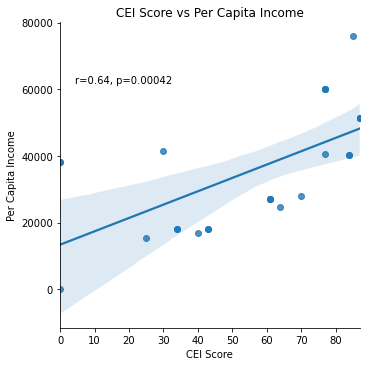

In [102]:
g = sns.lmplot(x='CEI score', y='per capita income', data=trees_grouped).set(title='CEI Score vs Per Capita Income')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['CEI score'], data['per capita income'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set( xlabel = "CEI Score", ylabel = "Per Capita Income")

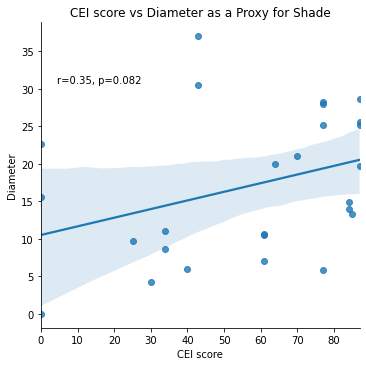

In [117]:
g = sns.lmplot(x='CEI score', y='diameter', data=trees_grouped).set(title='CEI score vs Diameter as a Proxy for Shade')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['CEI score'], data['diameter'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set( xlabel = "CEI score", ylabel = "Diameter")

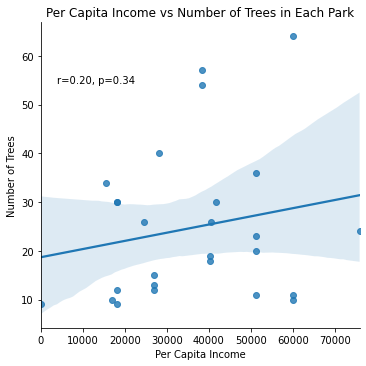

In [120]:
g = sns.lmplot(x='per capita income', y='count', data=trees_grouped).set(title='Per Capita Income vs Number of Trees in Each Park')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['per capita income'], data['count'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set( xlabel = "Per Capita Income", ylabel = "Number of Trees")

In [113]:
trees.groupby('CEI index')

Text(0, 0.5, 'Number of Trees')

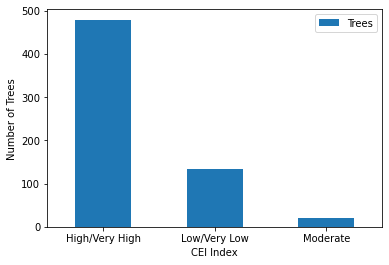

In [25]:
ax = trees.groupby('CEI index').count().plot.bar(y='tree', rot=0, label='Trees')

ax.set_xlabel('CEI Index')
ax.set_ylabel('Number of Trees')

<AxesSubplot:>

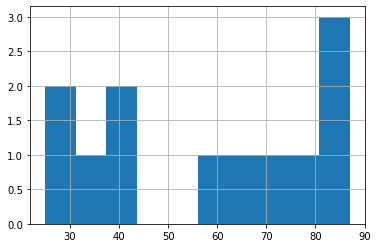

In [26]:

temp = trees['CEI score'].value_counts().index.tolist()
temp2 = trees['CEI score'].value_counts().tolist()
s = pd.Series(temp, temp2)
s.hist()

In [27]:
trees.reset_index()

,index,tree,park,fruit or nut,CEI score,CEI index,height (ft),circumference,diameter,acreage,census tract,per capita income,under 18,people per square mile
0,0,Brazilian Pepper,Cherokee Point Team 1,1,61.0,High/Very High,33.0,34.0,10.82,1.48,24.01,26947,0.27,19314.0
1,1,California Sycamore,Cherokee Point Team 1,1,61.0,High/Very High,37.5,28.0,8.91,1.48,24.01,26947,0.27,19314.0
2,2,African Fern Pine,Cherokee Point Team 1,1,61.0,High/Very High,24.0,27.0,8.59,1.48,24.01,26947,0.27,19314.0
3,3,California Sycamore,Cherokee Point Team 1,1,61.0,High/Very High,30.0,22.0,7.00,1.48,24.01,26947,0.27,19314.0
4,4,California Sycamore,Cherokee Point Team 1,1,61.0,High/Very High,37.5,28.0,8.91,1.48,24.01,26947,0.27,19314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,639,Lemon scented gum,Villa La Jolla Team 3,1,87.0,High/Very High,67.0,86.0,27.39,5.79,83.62,51313,0.20,10164.4
640,640,Lemon scented gum,Villa La Jolla Team 3,1,87.0,High/Very High,50.0,52.0,16.56,5.79,83.62,51313,0.20,10164.4
641,641,Blue Gum,Villa La Jolla Team 3,0,87.0,High/Very High,52.0,58.0,18.47,5.79,83.62,51313,0.20,10164.4
642,642,Lemon scented gum,Villa La Jolla Team 3,1,87.0,High/Very High,54.0,72.0,22.93,5.79,83.62,51313,0.20,10164.4


In [28]:
def CEI_encode(cei):
    if cei == 'High/Very High':
        return 1
    else:
        return 0

trees['CEI index'] = trees['CEI index'].apply(CEI_encode)
trees

,tree,park,fruit or nut,CEI score,CEI index,height (ft),circumference,diameter,acreage,census tract,per capita income,under 18,people per square mile
0,Brazilian Pepper,Cherokee Point Team 1,1,61.0,1,33.0,34.0,10.82,1.48,24.01,26947,0.27,19314.0
1,California Sycamore,Cherokee Point Team 1,1,61.0,1,37.5,28.0,8.91,1.48,24.01,26947,0.27,19314.0
2,African Fern Pine,Cherokee Point Team 1,1,61.0,1,24.0,27.0,8.59,1.48,24.01,26947,0.27,19314.0
3,California Sycamore,Cherokee Point Team 1,1,61.0,1,30.0,22.0,7.00,1.48,24.01,26947,0.27,19314.0
4,California Sycamore,Cherokee Point Team 1,1,61.0,1,37.5,28.0,8.91,1.48,24.01,26947,0.27,19314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,Lemon scented gum,Villa La Jolla Team 3,1,87.0,1,67.0,86.0,27.39,5.79,83.62,51313,0.20,10164.4
640,Lemon scented gum,Villa La Jolla Team 3,1,87.0,1,50.0,52.0,16.56,5.79,83.62,51313,0.20,10164.4
641,Blue Gum,Villa La Jolla Team 3,0,87.0,1,52.0,58.0,18.47,5.79,83.62,51313,0.20,10164.4
642,Lemon scented gum,Villa La Jolla Team 3,1,87.0,1,54.0,72.0,22.93,5.79,83.62,51313,0.20,10164.4


In [33]:
X = trees[['fruit or nut', 'CEI score', 'height (ft)','circumference', 'diameter','acreage']]
X= X.fillna(0)
y = trees['CEI index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

preds = clf.predict(X_test)

In [35]:
total = 0
for pred, label in zip(preds, y_test):
    if pred == label:
        total += 1
total/len(preds)

0.7628865979381443

<AxesSubplot:xlabel='CEI score', ylabel='CEI index'>

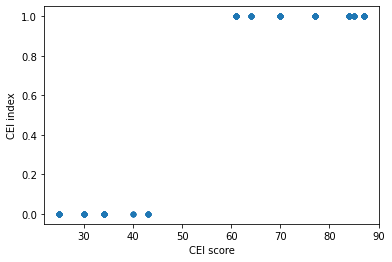

In [36]:
trees.plot.scatter('CEI score', 'CEI index')

group by CEI score/index and number of trees in each bin, bar graph

get more destrictive graphs

group by CEI index, see what kinda trees are in both categories